<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Get-the-data" data-toc-modified-id="Get-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get the data</a></span><ul class="toc-item"><li><span><a href="#How-to-faltten" data-toc-modified-id="How-to-faltten-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>How to faltten</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Modelling-4-species" data-toc-modified-id="Modelling-4-species-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modelling 4 species</a></span><ul class="toc-item"><li><span><a href="#Get-data-for-4-species-only" data-toc-modified-id="Get-data-for-4-species-only-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Get data for 4 species only</a></span></li><li><span><a href="#Naive-Bayes-model" data-toc-modified-id="Naive-Bayes-model-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Naive Bayes model</a></span></li><li><span><a href="#Decision-Tree-model" data-toc-modified-id="Decision-Tree-model-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Decision Tree model</a></span></li></ul></li></ul></div>

# Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageDraw


from sklearn.naive_bayes import BernoulliNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Get the data

In [2]:
all_pics = np.empty(0)
all_pics

array([], dtype=float64)

In [3]:
def import_pics(base_path):
    all_pics = list()
    all_labels = list()
    for species in os.listdir(base_path):
        for tmp_pic in os.listdir(base_path+species):
            all_labels.append(species)
            all_pics.append(np.array(Image.open(base_path+species+"/"+tmp_pic)))
    return np.array(all_pics), np.array(all_labels)

In [4]:
base_path = r'data/200_species_train/'
X_train, y_train = import_pics(base_path)

In [5]:
len(X_train), len(y_train)

(27503, 27503)

In [6]:
base_path = r'data/200_species_valid/'
X_val, y_val = import_pics(base_path)

In [7]:
len(X_val), len(y_val)

(1000, 1000)

## How to faltten

In [8]:
flat_X_train = np.array([x.flatten() for x in X_train])

In [9]:
X_train.shape

(27503, 224, 224, 3)

In [10]:
flat_X_train.shape

(27503, 150528)

# EDA

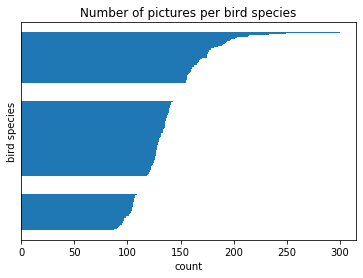

In [11]:
birds_counts = pd.DataFrame(np.unique(y_train,return_counts=True)).T.sort_values(by=1)
plt.barh(birds_counts[0],birds_counts[1]);
plt.yticks([]);
plt.ylabel("bird species")
plt.xlabel("count")
plt.title("Number of pictures per bird species")
plt.show;

In [136]:
all_species = np.unique(y_train)

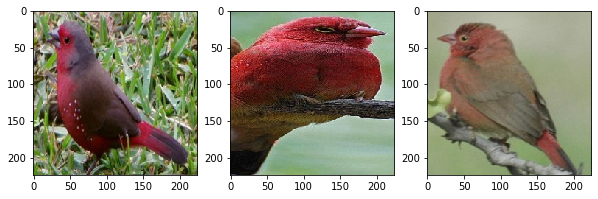

In [135]:
f, ax = plt.subplots(1,3,figsize=(10,30))
ax[0].imshow(X_train[0])
ax[1].imshow(X_train[1])
ax[2].imshow(X_train[2])

Already I see an issue here. The second picture looks kind of skweshed. How can we identify those, and should we filter them out?

97

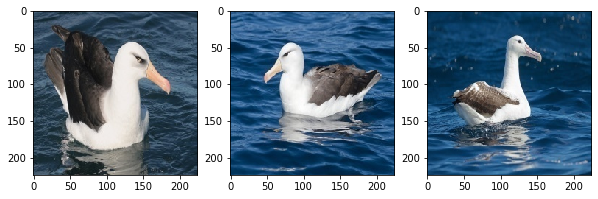

In [147]:
inds = np.where(y_train == all_species[1])[0]

f, ax = plt.subplots(1,3,figsize=(10,30))
ax[0].imshow(X_train[inds[0]])
ax[1].imshow(X_train[inds[1]])
ax[2].imshow(X_train[inds[2]])

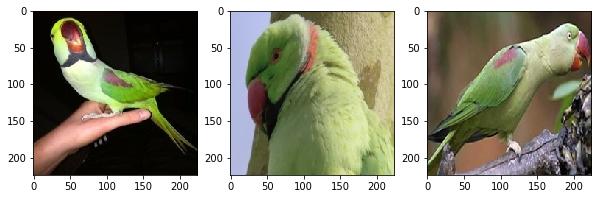

In [148]:
inds = np.where(y_train == all_species[2])[0]

f, ax = plt.subplots(1,3,figsize=(10,30))
ax[0].imshow(X_train[inds[0]])
ax[1].imshow(X_train[inds[1]])
ax[2].imshow(X_train[inds[2]])

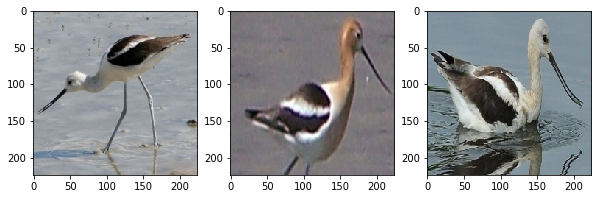

In [150]:
inds = np.where(y_train == all_species[3])[0]

f, ax = plt.subplots(1,3,figsize=(10,30))
ax[0].imshow(X_train[inds[0]])
ax[1].imshow(X_train[inds[1]])
ax[2].imshow(X_train[inds[2]])

# Modelling 4 species

## Get data for 4 species only

In [72]:
inds_4testing = range(581)

In [73]:
sub_y = y_train[inds_4testing]

In [74]:
pd.Series(sub_y).value_counts()

AMERICAN AVOCET         179
ALEXANDRINE PARAKEET    165
AFRICAN FIREFINCH       140
ALBATROSS                97
dtype: int64

In [75]:
sub_X = X_train[inds_4testing]

In [76]:
sub_X.shape

(581, 224, 224, 3)

In [80]:
sub_X_flat = np.array([x.flatten() for x in sub_X])

In [81]:
sub_X_flat.shape

(581, 150528)

In [115]:
pd.Series(sub_y).value_counts()

AMERICAN AVOCET         179
ALEXANDRINE PARAKEET    165
AFRICAN FIREFINCH       140
ALBATROSS                97
dtype: int64

## Naive Bayes model

In [82]:
nbc = BernoulliNB(binarize=0)
nbc.fit(sub_X_flat,sub_y)


BernoulliNB(alpha=1.0, binarize=0, class_prior=None, fit_prior=True)

In [83]:
pred_sub = nbc.predict(sub_X_flat)

In [113]:
print("accuracy is",round(metrics.accuracy_score(sub_y,pred_sub),3))
print("average recall is",round(metrics.recall_score(sub_y,pred_sub,average='weighted'),3))
print("average precision is",round(metrics.precision_score(sub_y,pred_sub,average='weighted'),3))
pd.DataFrame(metrics.confusion_matrix(sub_y,pred_sub),index=np.unique(sub_y),columns=np.unique(sub_y))

accuracy is 0.432
average recall is 0.432
average precision is 0.736


,AFRICAN FIREFINCH,ALBATROSS,ALEXANDRINE PARAKEET,AMERICAN AVOCET
AFRICAN FIREFINCH,22,0,2,116
ALBATROSS,0,10,3,84
ALEXANDRINE PARAKEET,0,1,43,121
AMERICAN AVOCET,1,0,2,176


That's all fucked up. we can see by the confusion matrix that most of the pictures were classified as **AMERICAN AVOCET**.

Is this because its value is three so the weight of it is higher?

## Decision Tree model

In [154]:
dtc = DecisionTreeClassifier()
dtc.fit(sub_X_flat,sub_y)

pred_sub = dtc.predict(sub_X_flat)

In [156]:
print("accuracy is",round(metrics.accuracy_score(sub_y,pred_sub),3))
print("average recall is",round(metrics.recall_score(sub_y,pred_sub,average='weighted'),3))
print("average precision is",round(metrics.precision_score(sub_y,pred_sub,average='weighted'),3))
pd.DataFrame(metrics.confusion_matrix(sub_y,pred_sub),index=np.unique(sub_y),columns=np.unique(sub_y))

accuracy is 1.0
average recall is 1.0
average precision is 1.0


,AFRICAN FIREFINCH,ALBATROSS,ALEXANDRINE PARAKEET,AMERICAN AVOCET
AFRICAN FIREFINCH,140,0,0,0
ALBATROSS,0,97,0,0
ALEXANDRINE PARAKEET,0,0,165,0
AMERICAN AVOCET,0,0,0,179


In [157]:
prob_sub = dtc.predict_proba(sub_X_flat)

In [159]:
np.unique(prob_sub)

array([0., 1.])